In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import time
%matplotlib inline
import scipy

Params 2.8482071023713167 6.112492844433795 1.2423926203090954 Tmin 6.345026391349815 Tmax 8.146770092312863
Params 1.846258917016262 5.845221483886835 1.005582733189128 Tmin 5.8938227758586414 Tmax 8.137825094690733
Params 1.546036905210991 5.96946631599881 0.39812493517664216 Tmin 5.975216372584422 Tmax 7.872474664536094
Params 1.520326585011278 5.983806018967635 0.6416308378650485 Tmin 5.992215317655096 Tmax 7.659043412579436
Params 0.8954113080323725 5.9839991924181595 0.24275683298542639 Tmin 5.98399919241816 Tmax 7.835434204815103
Params 0.8865092562791757 6.001246881927052 0.08431011035649391 Tmin 6.001246881927053 Tmax 6.590647100683456
Params 0.5309221882729301 6.05428189991718 0.08329605551051628 Tmin 6.054281899917181 Tmax 6.4460711013802765
Params 0.7707858625843294 6.126004971664129 0.04355731324327731 Tmin 6.126004971664148 Tmax 7.407504177474356
Params 0.6602064092602749 6.140527033507976 0.10842278889701741 Tmin 6.1405270335079765 Tmax 7.035616064964361
Params 0.6170871

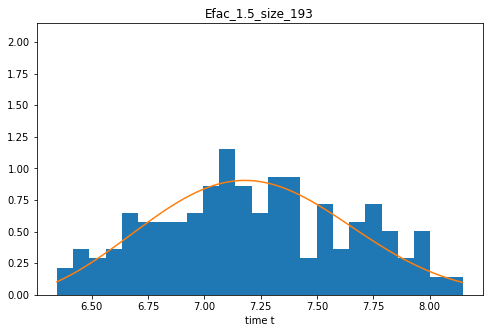

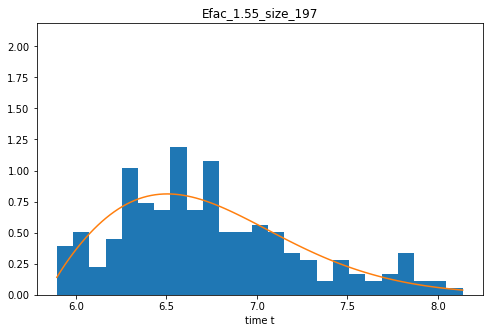

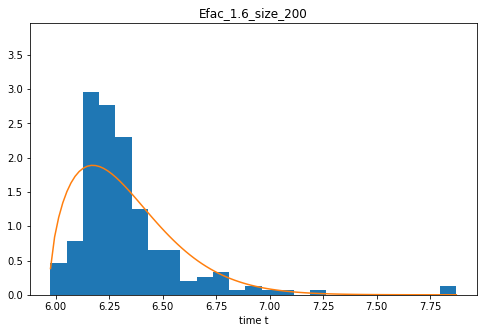

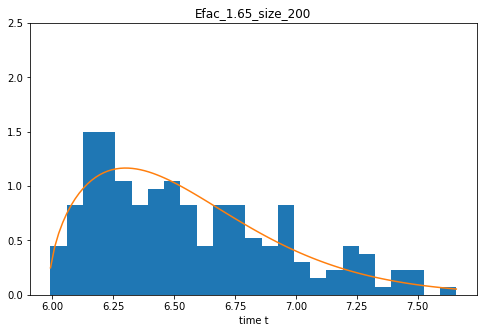

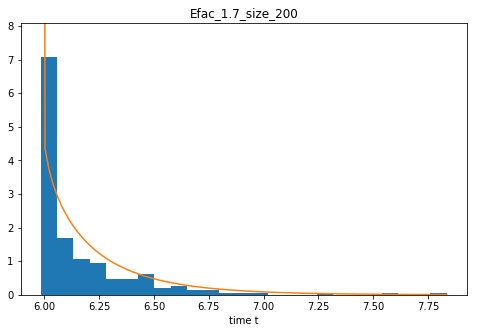

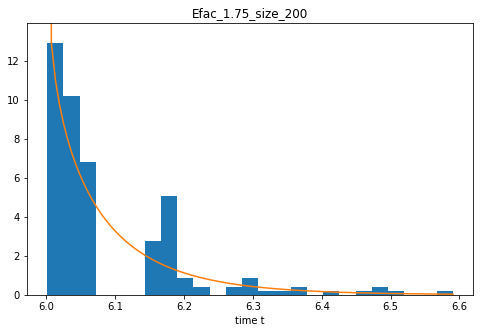

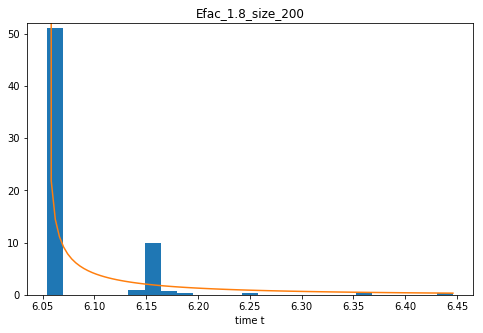

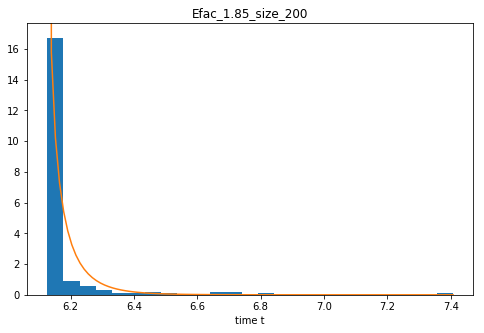

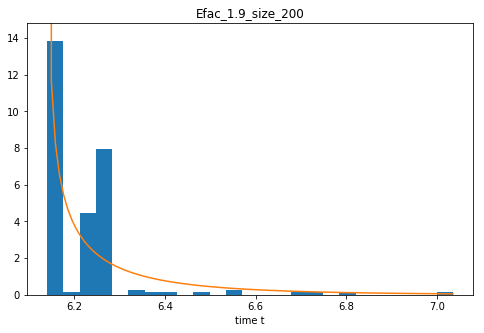

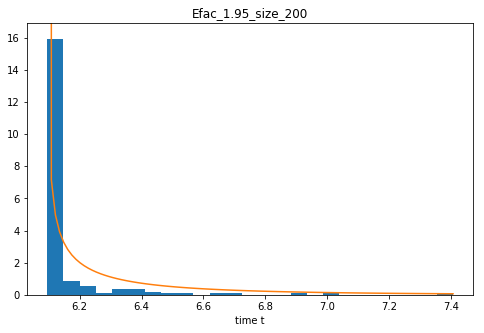

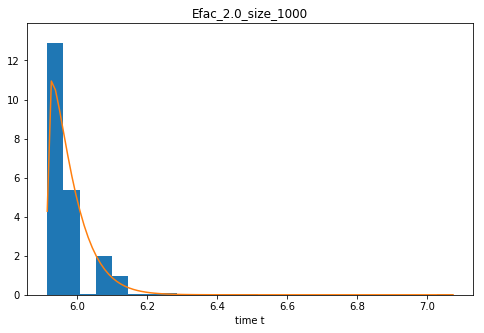

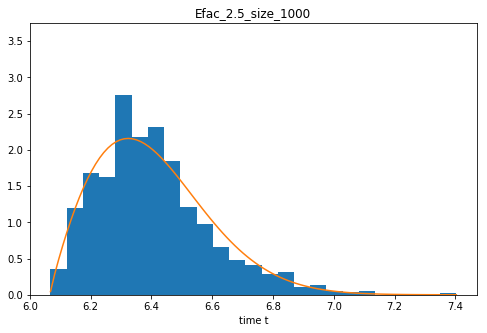

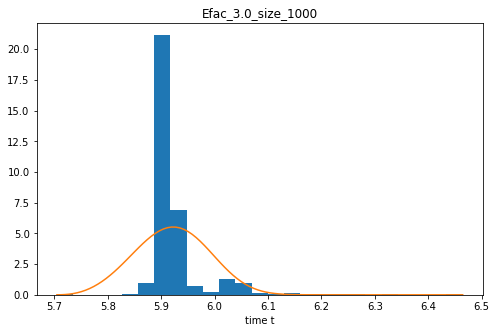

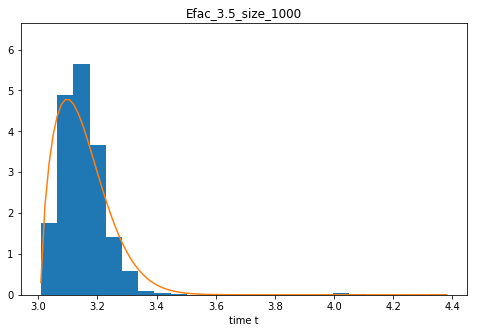

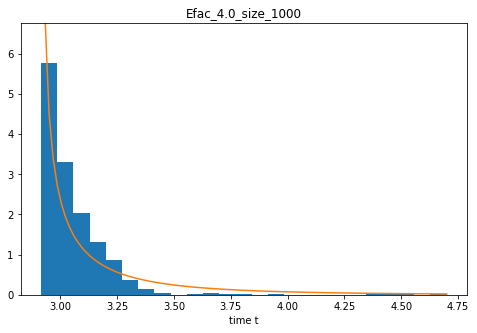

In [2]:
data = np.loadtxt("../../csvs/Solar_feats/Order.txt", dtype = str)
means = np.zeros(data.shape[0])
efac = np.zeros_like(means)
for i, name in enumerate(data):
    #print name
    
    times = pd.read_csv("../../csvs/Solar_feats/" + name, index_col=0)
    del times["Unnamed: 0.1"]
    #times = times[times["t"]!= np.nan]
    vals = times["t"].values
    vals = np.nan_to_num(vals)
    vals = vals[np.where(vals !=0)[0]]
    vals = vals/2./np.pi
    vals = np.log10(vals)
    fig, ax = plt.subplots(1, figsize  = (8, 5))
    #ax.set_title(name)
    ax.set_xlabel("time t")
    n, bins, patches =  ax.hist(vals, bins = 25, normed = 1)
    
    #weibull hist fits
    gamma_out, loc_out, alpha_out = stats.weibull_min.fit(vals)#, f0=a_in,floc=loc_in)
    print "Params", gamma_out, loc_out, alpha_out, "Tmin", vals.min(), "Tmax", vals.max()#, f0=a_in,floc=loc_in)
    means[i] = loc_out + alpha_out*scipy.special.gamma(1.+1./gamma_out)
    #print loc_out, alpha_out*scipy.special.gamma(1.+1./gamma_out)
    efac[i] = float(name.split("_")[1])
    x = np.linspace(vals.min(), vals.max(), 100)
    ax.set_title("Efac_{0}_size_{1}".format(efac[i],vals.shape[0]) )

    weib_vals = stats.weibull_min.pdf(x, c=gamma_out,loc=loc_out,scale = alpha_out)
    
    ax.plot(x, weib_vals)
    max_val = n.max()
    ax.set_ylim([0,max_val +1])
    #fig.savefig("../../Figures/Solar_Figures/Solar_efac{0}.png".format(efac[i]), bbox_inches = "tight")
    #break

Text(0,0.5,u'Instability Expected Value')

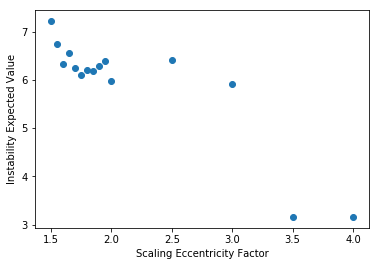

In [39]:
plt.scatter(efac, means)
plt.xlabel("Scaling Eccentricity Factor")
plt.ylabel("Instability Expected Value") 
#note this is not the loc parameter, though its a resonally decent apprximation
#plt.savefig("../../Figures/Solar_Figures/EXP_val_vs_efac.png", bbox_inches = "tight")

solar_1.5_1e9_1000.csv
Params 2.8482071023713167 6.112492844433795 1.2423926203090954 Tmin 6.345026391349815 Tmax 8.146770092312863
solar_1.55_1e9_1000.csv
Params 1.846258917016262 5.845221483886835 1.005582733189128 Tmin 5.8938227758586414 Tmax 8.137825094690733
solar_1.6_1e9_1000.csv
Params 1.546036905210991 5.96946631599881 0.39812493517664216 Tmin 5.975216372584422 Tmax 7.872474664536094
solar_1.65_1e9_1000.csv
Params 1.520326585011278 5.983806018967635 0.6416308378650485 Tmin 5.992215317655096 Tmax 7.659043412579436
solar_1.7_1e9_1000.csv
Params 0.8954113080323725 5.9839991924181595 0.24275683298542639 Tmin 5.98399919241816 Tmax 7.835434204815103
solar_1.75_1e9_1000.csv
Params 0.8865092562791757 6.001246881927052 0.08431011035649391 Tmin 6.001246881927053 Tmax 6.590647100683456
solar_1.8_1e9_1000.csv
Params 0.5309221882729301 6.05428189991718 0.08329605551051628 Tmin 6.054281899917181 Tmax 6.4460711013802765
solar_1.85_1e9_1000.csv
Params 0.7707858625843294 6.126004971664129 0.043

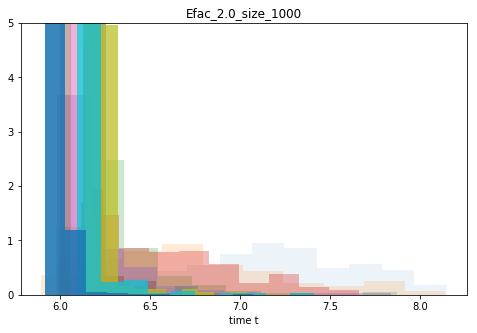

In [48]:
fig, ax = plt.subplots(1, figsize  = (8, 5))

for i, name in enumerate(data[:-4]):
    print name
    
    times = pd.read_csv("../../csvs/Solar_feats/" + name, index_col=0)
    del times["Unnamed: 0.1"]
    #times = times[times["t"]!= np.nan]
    vals = times["t"].values
    vals = np.nan_to_num(vals)
    vals = vals[np.where(vals !=0)[0]]
    vals = vals/2./np.pi
    vals = np.log10(vals)
    #ax.set_title(name)
    ax.set_xlabel("time t")
    n, bins, patches =  ax.hist(vals, normed=1, bins = 10, alpha= (i+1)*0.08)
    
    #weibull hist fits
    gamma_out, loc_out, alpha_out = stats.weibull_min.fit(vals)#, f0=a_in,floc=loc_in)
    print "Params", gamma_out, loc_out, alpha_out, "Tmin", vals.min(), "Tmax", vals.max()#, f0=a_in,floc=loc_in)
    #print loc_out, alpha_out*scipy.special.gamma(1.+1./gamma_out)
    x = np.linspace(vals.min(), vals.max(), 100)
    ax.set_title("Efac_{0}_size_{1}".format(efac[i],vals.shape[0]) )

    #weib_vals = stats.weibull_min.pdf(x, c=gamma_out,loc=loc_out,scale = alpha_out)
    
    #ax.plot(x, weib_vals)
    max_val = n.max()
    ax.set_ylim([0,5])
    #fig.savefig("../../Figures/Solar_Figures/Solar_efac{0}.png".format(efac[i]), bbox_inches = "tight")
    #break